In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qibo
import qibolab
from qibolab.paths import qibolab_folder

from qibolab.pulses import PulseSequence
from qibolab import Platform


print(qibo.__version__)
print(qibolab.__version__)

0.1.9
0.0.1.dev6


[Qibo 0.1.9|INFO|2023-02-02 11:15:09]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 11:15:09]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Max freq:  7371500000


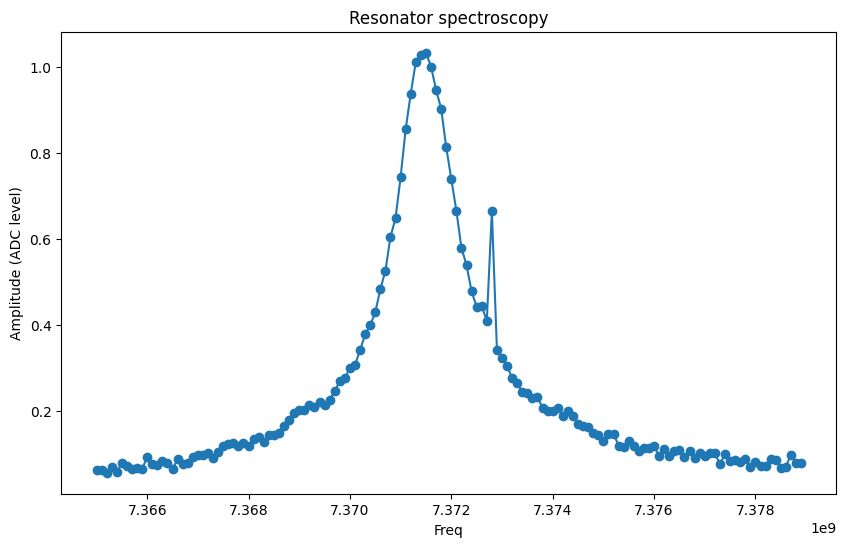

In [2]:
#
# Resonator spectroscopy
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")
platform.connect()
platform.setup()

start = 7365000000
stop =  7379000000
step = 100000
platform.connect()
platform.setup()
freqs = np.arange(start, stop, step)
length = 40
results = []
for i, freq in enumerate(freqs):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    platform.settings["native_gates"]["single_qubit"][0]["MZ"]["frequency"] = int(freq)
    sequence = PulseSequence()
    sequence.add(ro_pulse)

    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(freqs, amp, 'o-')
plt.title("Resonator spectroscopy")
plt.xlabel("Freq")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")
print("Max freq: ",freqs[np.argmax(amp)])

Max freq:  7371600000


[Qibo 0.1.9|INFO|2023-02-02 12:53:24]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 12:53:24]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Max freq:  5431500000


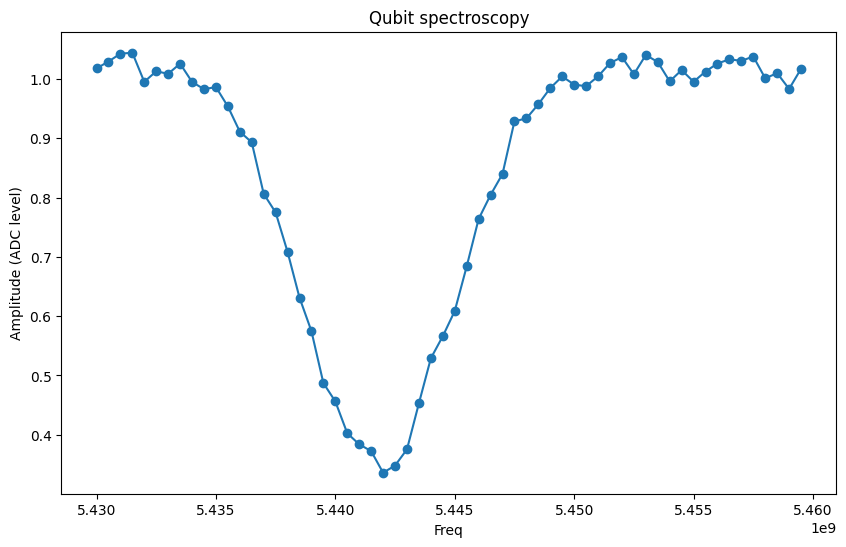

In [9]:
#
# Qubit spectroscopy
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

platform.connect()
platform.setup()

start = 5430000000
stop =  5460000000
step =      500000
platform.connect()
platform.setup()
freqs = np.arange(start, stop, step)
results = []
for i, freq in enumerate(freqs):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    platform.settings["native_gates"]["single_qubit"][0]["RX"]["frequency"] = int(freq)
    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)

    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(freqs, amp, 'o-')
plt.title("Qubit spectroscopy")
plt.xlabel("Freq")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")
print("Max freq: ",freqs[np.argmax(amp)])

In [16]:
#
# Qibo example
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")
platform.connect()
platform.setup()
qd_pulse0 = platform.create_RX_pulse(0, start=0)
qd_pulse1 = platform.create_RX_pulse(0, start=0)
qd_pulse2 = platform.create_RX_pulse(0, start=0)
ro_pulse1 = platform.create_MZ_pulse(0, start=qd_pulse1.duration)
sequence = PulseSequence()
sequence.add(qd_pulse0)
sequence.add(qd_pulse1)
sequence.add(qd_pulse2)
sequence.add(ro_pulse1)

result = platform.execute_pulse_sequence(sequence, nshots=100)



[Qibo 0.1.9|INFO|2023-02-01 16:37:45]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-01 16:37:45]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


(0.9361938179414031, 0.37836034911180183, 0.8699782962561042, 0.3458274552360282)


[Qibo 0.1.9|INFO|2023-02-02 14:50:19]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 14:50:19]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Text(0, 0.5, 'Amplitude (ADC level)')

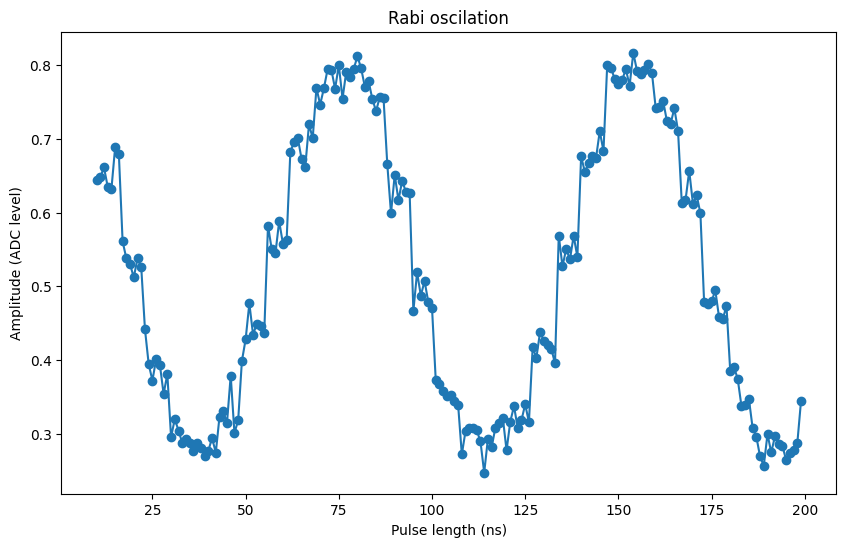

In [19]:
#
# Rabi oscillation - Length
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

start = 10
step = 1
stop = 200
platform.connect()
platform.setup()
lengths = np.arange(start, stop, step)
results = []
for i, length in enumerate(lengths):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.duration = length
    #qd_pulse.shape.rel_sigma = length/4

    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(lengths,amp,'o-');
plt.title("Rabi oscilation")
plt.xlabel("Pulse length (ns)")
plt.ylabel("Amplitude (ADC level)")



[Qibo 0.1.9|INFO|2023-02-02 15:22:40]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 15:22:40]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Text(0, 0.5, 'Amplitude (ADC level)')

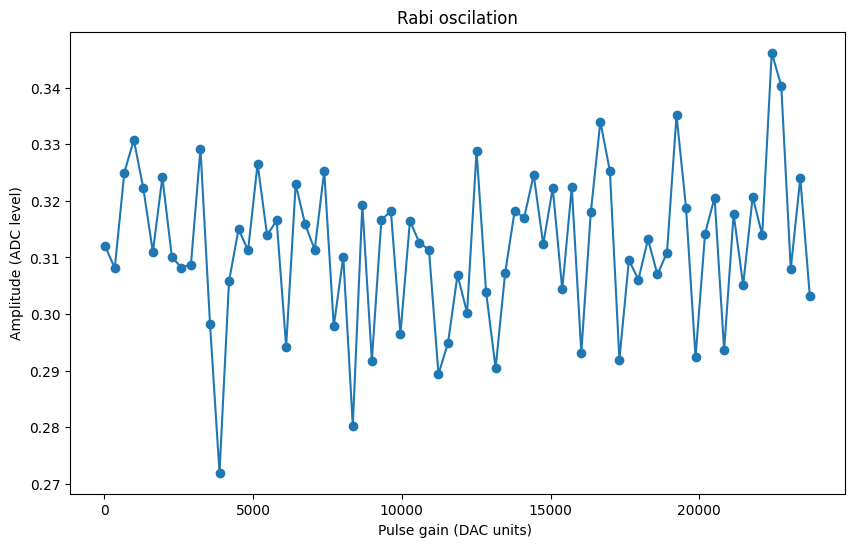

In [24]:
#
# Rabi oscillation - Gain
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

start = 0.001
step = 0.01
stop = 0.75
platform.connect()
platform.setup()
amplitudes = np.arange(start, stop, step)
results = []
for i, amplitude in enumerate(amplitudes):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.amplitude = amplitude

    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(amplitudes * 32000,amp,'o-');
plt.title("Rabi oscilation")
plt.xlabel("Pulse gain (DAC units) ")
plt.ylabel("Amplitude (ADC level)")

